# Trustworthy AI for 6G-V2X Communications

## Importing Used Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Dataset Load

In [2]:
# Load the dataset for 5G from a CSV file (replace "5g_dataset.csv" with your 5G dataset file name)
data_5g = pd.read_csv(r"end_to_end_delay_5g(1).csv")
data_5g.head()

,Packet ID,Source,Destination,End-to-End Delay,Priority,Traffic Class
0,1,197,959,10.0,4,Video Streaming
1,2,768,301,10.0,3,Web Browsing
2,3,90,715,10.1,3,Video Streaming
3,4,536,554,10.1,2,Video Streaming
4,5,920,904,10.1,3,VoIP


In [3]:
data_6g = pd.read_csv(r"end_to_end_delay_6g.csv")
data_6g.head()

,Packet ID,Source,Destination,End-to-End Delay,Priority,Traffic Class
0,1,717,677,8.416667,5,VoIP
1,2,708,957,8.666667,3,VoIP
2,3,179,174,8.750000,5,Video Streaming
3,4,124,999,8.916667,4,VoIP
4,5,343,402,9.000000,3,Web Browsing


In [4]:
data_5g = data_5g.dropna()
data_6g = data_6g.dropna()

In [5]:
# Step 2: Drop the last column
data_5g = data_5g.iloc[:, :-1]  # Drop last column
data_6g = data_6g.iloc[:, :-1]  # Drop last column

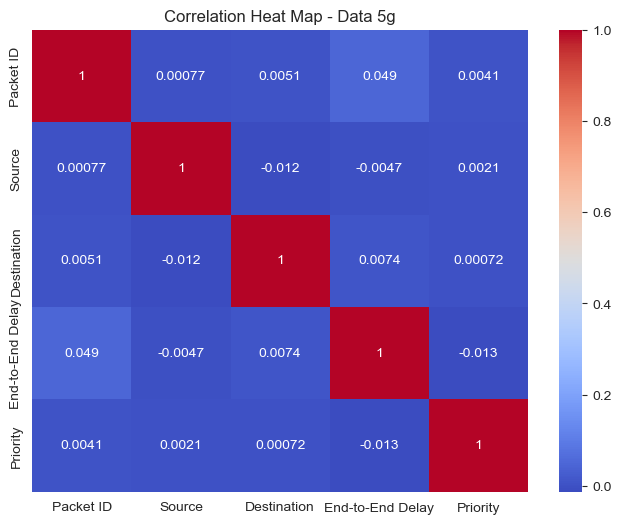

In [6]:
correlation_matrix = data_5g.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heat Map - Data 5g")
plt.show()

In [7]:
data_5g.head()

,Packet ID,Source,Destination,End-to-End Delay,Priority
0,1,197,959,10.0,4
1,2,768,301,10.0,3
2,3,90,715,10.1,3
3,4,536,554,10.1,2
4,5,920,904,10.1,3


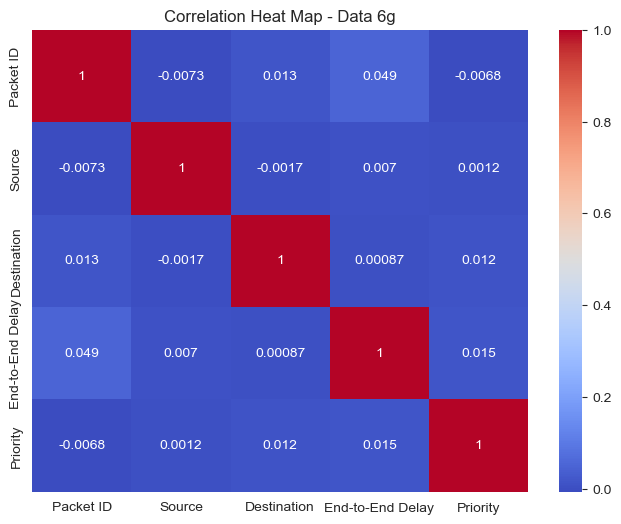

In [8]:
correlation_matrix = data_6g.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heat Map - Data 6g")
plt.show()

In [9]:
data_6g.head()

,Packet ID,Source,Destination,End-to-End Delay,Priority
0,1,717,677,8.416667,5
1,2,708,957,8.666667,3
2,3,179,174,8.750000,5
3,4,124,999,8.916667,4
4,5,343,402,9.000000,3


In [10]:
# Step 3: Split the datasets
X_5g = data_5g.drop('End-to-End Delay', axis=1)
y_5g = data_5g['End-to-End Delay']
X_6g = data_6g.drop('End-to-End Delay', axis=1)
y_6g = data_6g['End-to-End Delay']


## Training Algorithm

In [11]:
from onedal.neighbors import KNeighborsRegressor

# Step 4: Train and evaluate the algorithms
models = {
    'Linear Regression': LinearRegression(),
    'k-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'Gradient Boosting': GradientBoostingRegressor()}
results = {}

In [12]:
for name, model in models.items():
    # Train the model on 5G dataset
    X_train_5g, X_test_5g, y_train_5g, y_test_5g = train_test_split(X_5g, y_5g, test_size=0.2)
    model.fit(X_train_5g, y_train_5g)
    y_pred_5g = model.predict(X_test_5g)
    # Evaluate the model on 6G dataset
    X_train_6g, X_test_6g, y_train_6g, y_test_6g = train_test_split(X_6g, y_6g, test_size=0.2)
    model.fit(X_train_6g, y_train_6g)
    y_pred_6g = model.predict(X_test_6g)

### Storing Results

In [13]:
results[name] = {'5G': (y_test_5g, y_pred_5g), '6G': (y_test_6g, y_pred_6g)}

In [14]:
# Step 5: Compare the results
from sklearn.metrics import mean_squared_error

def print_evaluation_metrics(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    print(f"Mean Squared Error: {mse}")
for name, result in results.items():
    print(f"Algorithm: {name}")
    print("Results for 5G:")
    # Print evaluation metrics for 5G dataset
    print_evaluation_metrics(*result['5G'])
    print("Results for 6G:")
    # Print evaluation metrics for 6G dataset
    print_evaluation_metrics(*result['6G'])
    print()

Algorithm: Gradient Boosting
Results for 5G:
Mean Squared Error: 635.0975197110888
Results for 6G:
Mean Squared Error: 458.09313640768494



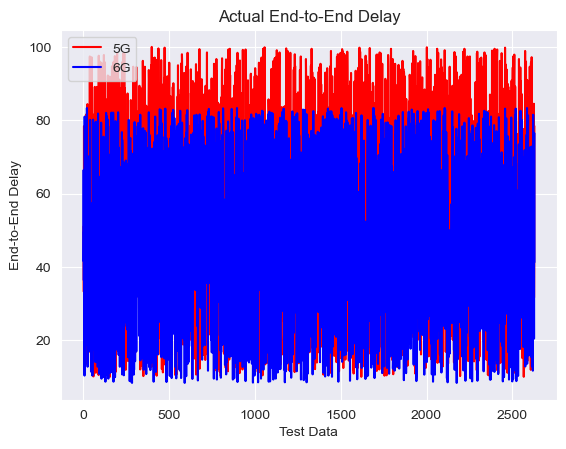

In [15]:
# Resize the y_test_6g array to the length of the y_test_5g array
y_test_6g = np.resize(y_test_6g, len(y_test_5g))

# Plot the data
test_data = np.arange(len(y_test_5g))
plt.plot(test_data, y_test_5g, color='red', label='5G')
plt.plot(test_data, y_test_6g, color='blue', label='6G')
plt.title('Actual End-to-End Delay')
plt.xlabel('Test Data')
plt.ylabel('End-to-End Delay')
plt.legend()
plt.show()

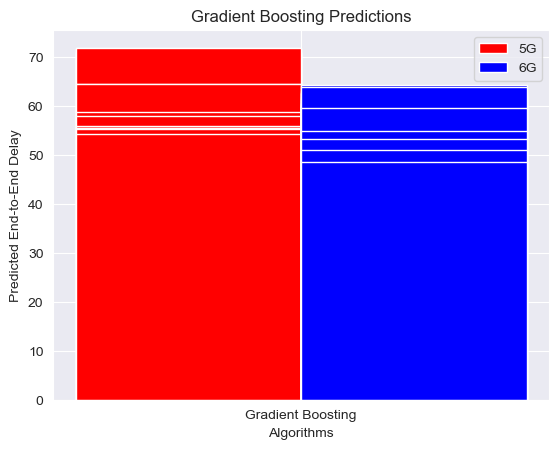

<Figure size 640x480 with 0 Axes>

In [16]:
# Step 6: Generate bar graphs
x = np.arange(len(results))
width = 0.35

for name, result in results.items():
    fig, ax = plt.subplots()
    ax.bar(x - width/2, result['5G'][1], width, color='red', label='5G')
    ax.bar(x + width/2, result['6G'][1], width, color='blue', label='6G')
    ax.set_xlabel('Algorithms')
    ax.set_ylabel('Predicted End-to-End Delay')
    ax.set_title(f"{name} Predictions")
    ax.set_xticks(x)
    ax.set_xticklabels(results.keys())
    ax.legend()
    plt.show()
    plt.savefig('Gradient Boost.pdf')

## Compairing Results

Algorithm: Gradient Boosting
Results for 5G:
Mean Squared Error: 635.0975197110888
Results for 6G:
Mean Squared Error: 458.09313640768494



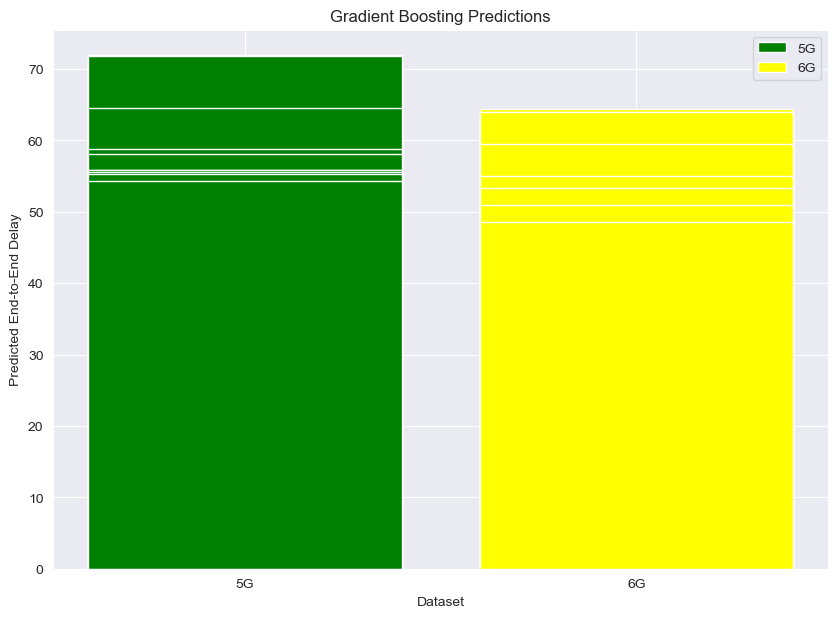

In [17]:
# Step 5: Compare the results
for name, result in results.items():
    print(f"Algorithm: {name}")
    print("Results for 5G:")
    # Print evaluation metrics for 5G dataset
    print_evaluation_metrics(*result['5G'])
    print("Results for 6G:")
    # Print evaluation metrics for 6G dataset
    print_evaluation_metrics(*result['6G'])
    print()
    
    # Step 6: Generate bar graph for each algorithm
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.bar('5G', result['5G'][1], color='green', label='5G')
    ax.bar('6G', result['6G'][1], color='yellow', label='6G')
    ax.set_xlabel('Dataset')
    ax.set_ylabel('Predicted End-to-End Delay')
    ax.set_title(f"{name} Predictions")
    ax.legend()
    plt.show()


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [19]:
# Prepare the data for training the model
X_5g = data_5g.drop('End-to-End Delay', axis=1).values
y_5g = data_5g['End-to-End Delay'].values

X_6g = data_6g.drop('End-to-End Delay', axis=1).values
y_6g = data_6g['End-to-End Delay'].values

In [20]:
# Train the model on the 5G dataset
model_5g = LinearRegression()
model_5g.fit(X_5g, y_5g)

# Evaluate the model on the 6G dataset
y_6g_pred = model_5g.predict(X_6g)
mse_6g = mean_squared_error(y_6g, y_6g_pred)

# Calculate the mean squared error for 5G
y_5g_pred = model_5g.predict(X_5g)
mse_5g = mean_squared_error(y_5g, y_5g_pred)

In [21]:
# Print the mean squared error for 5G and 6G
print(f"Mean Squared Error (5G): {mse_5g}")
print(f"Mean Squared Error (6G): {mse_6g}")

Mean Squared Error (5G): 668.719163802412
Mean Squared Error (6G): 564.2338151620937


In [22]:
# Compare the performance of 5G and 6G
if mse_5g < mse_6g:
    print("5G has a lower mean squared error, indicating better performance.")
elif mse_5g > mse_6g:
    print("6G has a lower mean squared error, indicating better performance.")
else:
    print("5G and 6G have the same mean squared error.")
# Calculate the mean squared error for 5G and 6G
mse_values = [mse_5g, mse_6g]

6G has a lower mean squared error, indicating better performance.


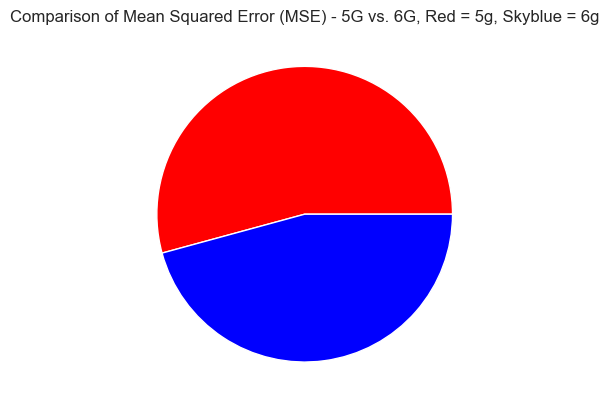

In [23]:
# Plot the bar graph
plt.pie(mse_values)

plt.pie(mse_values, colors=['Red','blue'])
plt.title('Comparison of Mean Squared Error (MSE) - 5G vs. 6G, Red = 5g, Skyblue = 6g')
plt.show()

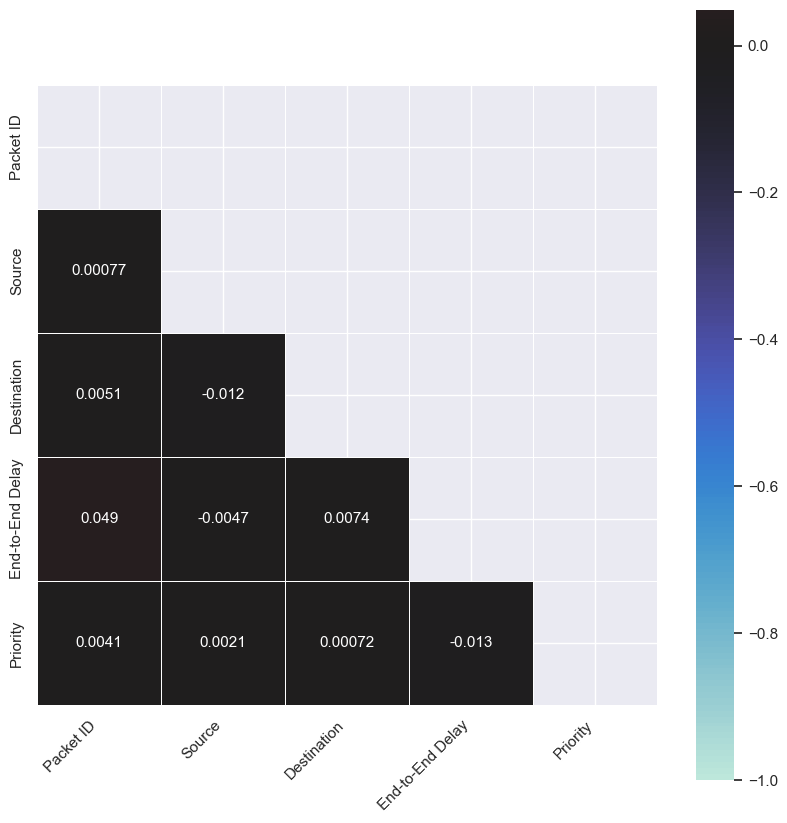

In [24]:
correlation_matrix = data_5g.corr()
fig = plt.figure(figsize=(10,10))
mask = np.zeros_like(correlation_matrix, dtype=np.bool_)
mask[np.triu_indices_from(mask)]= True
sns.set_theme(style="darkgrid")
ax = sns.heatmap(correlation_matrix,square = True,annot=True,center=0,vmin=-1,linewidths = .5,annot_kws = {"size": 11},mask = mask)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right');
plt.show()

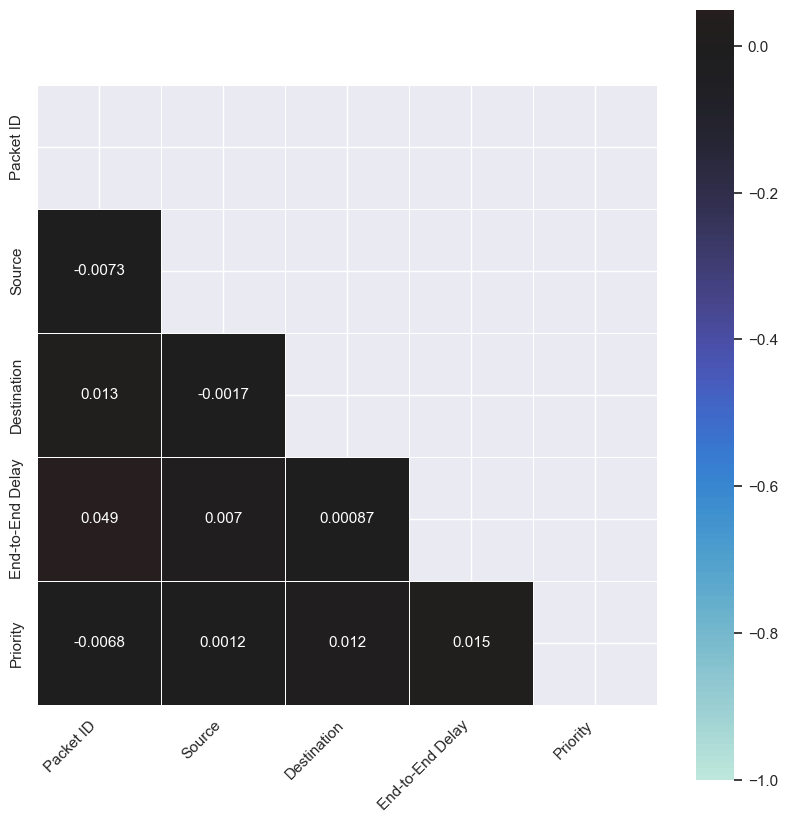

In [25]:
correlation_matrix = data_6g.corr()
fig = plt.figure(figsize=(10, 10))
mask = np.zeros_like(correlation_matrix, dtype=np.bool_)
mask[np.triu_indices_from(mask)]= True
sns.set_theme(style="darkgrid")
ax = sns.heatmap(correlation_matrix,square = True,annot=True,center=0,vmin=-1,linewidths = .5,annot_kws = {"size": 11},mask = mask)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right');
plt.show()

In [26]:
#KNN Regression for 5G
from sklearn.neighbors import KNeighborsRegressor

In [30]:
for name, model in models.items():
    # Train the model on 5G dataset
    X_train_5g, X_test_5g, y_train_5g, y_test_5g = train_test_split(X_5g, y_5g, test_size=0.2)
    model = KNeighborsRegressor()
    model.fit(X_train_5g, y_train_5g)
    y_pred_5g = model.predict(X_test_5g)
    # Evaluate the model on 6G dataset
    X_train_5g, X_test_5g, y_train_5g, y_test_5g = train_test_split(X_5g, y_5g, test_size=0.2)
    model.fit(X_train_5g, y_train_5g)
    y_pred_5g = model.predict(X_test_5g)

    mse_5g = mean_squared_error(y_test_5g, y_pred_5g)
    print(f"MSE for {name} on 5G dataset: {mse_5g}")

MSE for Linear Regression on 5G dataset: 764.0180809125476
MSE for k-Nearest Neighbors on 5G dataset: 774.6297317110268
MSE for Decision Tree on 5G dataset: 774.7951227376427
MSE for Random Forest on 5G dataset: 749.3298038022816
MSE for Support Vector Regression on 5G dataset: 771.5205940684411
MSE for Gradient Boosting on 5G dataset: 790.5779025095059


In [28]:
for name, model in models.items():
    # Train the model on 5G dataset
    X_train_5g, X_test_5g, y_train_5g, y_test_5g = train_test_split(X_5g, y_5g, test_size=0.2)
    model = KNeighborsRegressor()
    model.fit(X_train_5g, y_train_5g)
    y_pred_5g = model.predict(X_test_5g)
    # Evaluate the model on 6G dataset
    X_train_6g, X_test_6g, y_train_6g, y_test_6g = train_test_split(X_6g, y_6g, test_size=0.2)
    model.fit(X_train_6g, y_train_6g)
    y_pred_6g = model.predict(X_test_6g)

    mse_6g = mean_squared_error(y_test_6g, y_pred_6g)
    print(f"MSE for {name} on 6G dataset: {mse_6g}")

MSE for Linear Regression on 6G dataset: 516.2315295508273
MSE for k-Nearest Neighbors on 6G dataset: 542.3140729905438
MSE for Decision Tree on 6G dataset: 541.5967083333333
MSE for Random Forest on 6G dataset: 528.0274448384554
MSE for Support Vector Regression on 6G dataset: 535.1718436761229
MSE for Gradient Boosting on 6G dataset: 539.639381895193


In [29]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


